# SLT-CE-2: Deterministic Annealing

In [ ]:
##grade: 6.0

### References

<ol>
<li> Sections II.A.1 (principled derivation of deterministic annealing) and II.A.3 (Mass-constrained clustering) of 'Deterministic annealing for clustering, compression, classification, regression, and related optimization problems', Kenneth Rose, 1998, http://ieeexplore.ieee.org/document/726788/ 
</li>

<li>
The wine data set, http://www3.dsi.uminho.pt/pcortez/wine5.pdf
</li>
    
</ol>

### Setup 

In [1]:
!pip install treelib
!pip install pathos

In [2]:
import sklearn as skl
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import sklearn.svm as svm
from sklearn import cluster

import pandas as pd
import numpy as np
from treelib import Tree

import matplotlib.pyplot as plt
from matplotlib import cm
import time

<h2 style="background-color:#f0b375;">
Section 4.0
<span style=font-size:50%> Complete all problems in this and previous sections to get a grade of 4.0 </span>
</h2>

<p style="background-color:#adebad;">
    For this exercise, it is of utmost importance to read reference [1] about deterministic annealing clustering (DAC). Our implementation will be based on this reference. Please shortly summarize what they refer to as the <i>preferred implementation</i> of the DAC algorithm.
</p>

The mass constrained clustering approach is the preferred implementation of the DA clustering algorithm. The annealing process a certain dependence on the number of coincident codevectors in each effective cluster. The mass constrained clustering approach attempts to eliminate this undesirable feature.
In mass constrained clustering (preferred implementaiton), the normalizatin $Z_x$ only treats the fraction $p_i$ of code vectors which denote the effective cluster $i$: $Z_x= \sum_i p_i e^{-d(x,y_i)/T}$. Furthermore, the probability of associaiton only treats the distinct codevector $y_j$ and is the following tilted distribution: $p(y_j|x)=\frac{ p_je^{-(d(x,y_j)/T)} }{Z_X}$.  Finally, the mass-constrained formulation only needs as many codevectors as there are effective clusters at a given temperature. THis makes the process computationally efficient. The mode size is then only increased when it is needed (when critical temperature has been reached).


    
    

<p style="background-color:#adebad;">
    In order to avoid headaches with numerical instabilities, we first try our algorithm on a simple artificially generated data as below. Run the bloc below to have a look at the data. Later when we have everything implemented, we will examine some real world data. 
</p>

In [3]:
n_clusters = 4
ran_s = 42

# Generate artificial dataset
X, y_true = make_blobs(n_samples=7000, centers=4,
                       cluster_std=0.3, random_state=ran_s,
                       center_box=(-8.0, 8.0),
                       shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_true, train_size=6000, random_state=42)


<p style="background-color:#adebad;">
    Implement the <b>fit method</b> for the template class DeterministicAnnealing, according to the contract outlined in its docstring. (The template class DeterministicAnnealing is in file <b>DA.py</b> which you can open in your favourite IDE) For the implementation, it may help to take a look at both <b>get_distance method</b> and <b>fit _calculate_cluster_probs method</b> and implement them as well. Of course you are free to change all these methods or/and write additional methods for your purpose.
    You can add more class methods as necessary.
    See http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html for complementary information.
</p>
<p style="background-color:#adebad;">
    While implementing, you can run the bloc below to test your implementation.
</p>

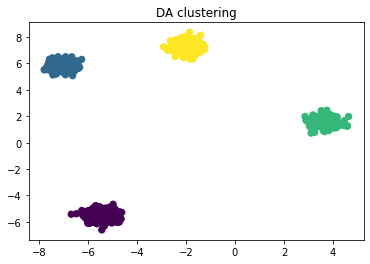

In [4]:
from DA import DeterministicAnnealingClustering
DAC = DeterministicAnnealingClustering(
    n_clusters=n_clusters, random_state=ran_s)
DAC.fit(X_train)
y_DAC = DAC.predict(X_test)
y_DAC_hard = np.argmax(y_DAC, axis=1)
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_DAC_hard, s=40, cmap='viridis')
plt.title("DA clustering")
plt.show()

<h2 style="background-color:#f0b375;">
Section 4.5
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points. Note that you can have a maximum of 6 points at the end.</span>
</h2>

<p style="background-color:#adebad;">
    In this section we implement a plot which will help us better understand the DA method, and could also be a help for better debugging of your implementation.
    
 <ul style="background-color:#adebad;">
        <li> 
            Modify your implementation of <b>fit</b> function such that <b>plot_phase_diagram</b> method will produce a plot similar to the phase diagram plot shown in Figure 2 of the reference paper.
        </li>
</ul>  
</p>

<ul style="background-color:#adebad;">
            For this, extend DAC.fit to save the expected distortion during annealing as an additional attribute self.distortion.
            You might also want to save the number of effective clusters and the temperature along the way.
    </ul>
</p>

#### extend DAC.fit(self, X):
    # ...
    # Save information for each (n-th) annealing step:
    # self.distortion = [d0, d1, d2, ...]
    # self.n_eff_clusters = [e0, e1, e2, ...]
    # self.temp = [t0, t1, t2, ...]
    # ...

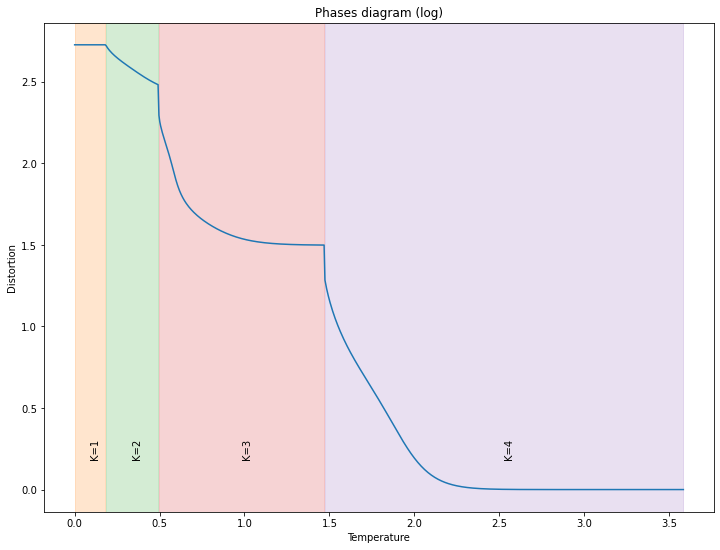

In [5]:
DAC.plot_phase_diagram()

<h2 style="background-color:#f0b375;">
Section 5.0
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points.</span>
</h2>
<ul style="background-color:#adebad;">
Here we implement another plot which helps better undetrstad the dynamics of the algorithm.
        <li>
        Implement DAC.plot_bifurcation, which should create a bifurcation plot.<br>
        Modify DAC.fit to keep track of the distances, using the tree object DAC.bifurcation_tree. When a cluster splits, it creates two child nodes. Each node should store its centroid vector, and the distance to the parent centroid vector. After splitting, the parent node is not updated anymore.<br>
        In the bifurcation plot, the horizontal distance of a child node to its parent node should be exactly the distance to the parent centroid vector. The two child nodes should move in opposite directions, i.e. one to the left of the parent and one to the right.
        </li>
</ul>

This section could bit a bit annoying, you can also jump to the next sections and come back here later. 

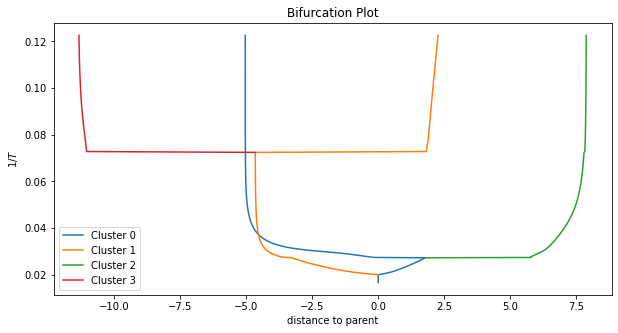

In [6]:
DAC.plot_bifurcation()

<h2 style="background-color:#f0b375;">
Section 5.5
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points.</span>
</h2>

<p style="background-color:#adebad;">
Now we are ready to use some real world data. This might need some tweaking and handling of numberical instabilities. Please make sure your understand the data.
</p>

<p style="background-color:#adebad;">
Read the wine data [3], which contains 11 physiochemical attributes, and two labels (quality and color).
</p>

<p style="background-color:#adebad;">
    Create an instance of your DAC class with n_clusters = 2 and <b>fit the first 6000 samples</b> of the wine data set. Record the execution time. Furthermore, create an instance of the sklearn k-means class, and fit it with the same parameters. Again record the execution time. Make sure that the hyper parameters (initial temperature, min temperature, convergence criteria, noise, etc.) make sense and lead to a reasonable clustering
</p>

In [7]:
from DA import read_data_csv
X, y = read_data_csv("wine-data.csv", y_names=["quality", "color"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y["color"], train_size=6000, random_state=42)
X_train_quality, X_test_quality, y_train_quality, y_test_quality = train_test_split(
    X, y["quality"], train_size=6000, random_state=42)

In [8]:
# JUST RESPONSIBLE FOR CONVERTING WINE COLOURS INTO BINARIES
y_train_binary=[]
y_test_binary=[]
for i in range(y_train.shape[0]):
    if y_train[i] == 'white':
        y_train_binary.append(1)
    else: y_train_binary.append(0)
y_train_binary=np.array(y_train_binary)
for i in range(y_test.shape[0]):
    if y_test[i] == 'white':
        y_test_binary.append(1)
    else: y_test_binary.append(0)
y_test_binary=np.array(y_test_binary)

In [9]:
start = time.time()
DAC = DeterministicAnnealingClustering(n_clusters=2, random_state=42)
DAC.fit(X_train)
y_DAC_train_soft= DAC.predict(X_train)
end = time.time()
print('DAC train execution time:', end-start)
y_DAC_train_hard= np.argmax(y_DAC_train_soft, axis=1)

DAC train execution time: 37.667423486709595


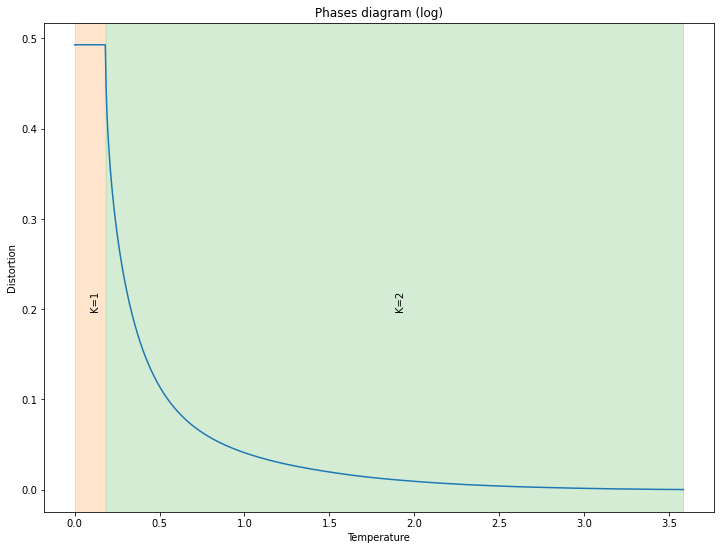

In [10]:
DAC.plot_phase_diagram()

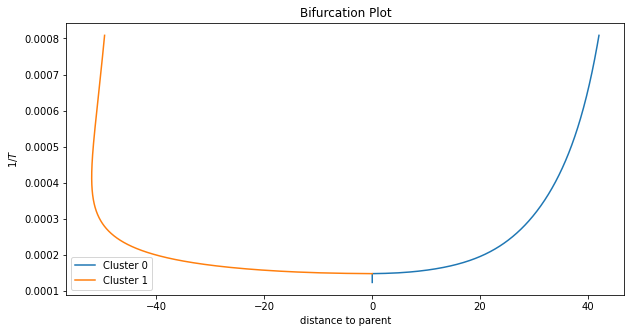

In [11]:
DAC.plot_bifurcation()

REASONABLE CLUSTERING:
*   clustering leads to significant reduction in distortion hence phase diagram
*   clusters diverge from global mean after the first split occurs


In [12]:
start = time.time()
kmeans = cluster.KMeans(n_clusters=2,random_state=42)
kmeans.fit(X_train)
y_kmeans_train = kmeans.predict(X_train)
end = time.time()
time_ = end-start
print('KMeans train execution time:', time_)

KMeans train execution time: 0.10652494430541992


In [13]:
start = time.time()
y_kmeans = kmeans.predict(X_test)
end = time.time()
time_ = end-start
print('KMeans test execution time:', time_)

KMeans test execution time: 0.0019943714141845703


In [14]:
start = time.time()
y_DAC = DAC.predict(X_test)
end = time.time()
print('execution time:', end-start)
y_DAC_test_hard= np.argmax(y_DAC, axis=1)

execution time: 0.0009965896606445312


<h2 style="background-color:#f0b375;">
Section 6.0
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points.</span>
</h2>
<ul style="background-color:#adebad;">
<li> Before we can compute the confusion matrix, we need to perform some post-processing on the DAC cluster assignments.
    Explain what the function postprocess (defined below) does, and why we need it. To do so, complete the docstring of the function postprocess.
        </li>
</ul>

In [15]:
def postprocess(y_DAC, y_kmeans):
    """The function converts the soft clustering of the DAC algorithm into hard 
       clustering, where the cluster are shuffled appropriately to resemble that 
       of the KMeans algorithm in order to make the cluster assignments of the 
       two different algorithms comparable. This is done by determining which 
       points are assignend to each cluster with maximum confidence in the DAC
       prediction (y_DAC) and then by checking which cluster these points are 
       assigned to in the KMeans clustering (y_kmeans). The hard clustering of
       the DAC algorithm is then appropriately reassigned to these clusters (if
       not already equivalent).

    Args:
        y_DAC (np.ndarray): 
            - soft clustering according to deterministic annealing clustering process
            - elements: (y_DAC)_ij = p(y_j | x_i)
            - shape: (n_observations, n_clusters)
        y_kmeans (np.ndarray): 
            - hard clustering according to kmeans algorithm
            - elements: (y_kmeans)_i = boolian assigning observation x_i to 
                                       corresponding kmeans cluster
            - shape: (n_observations,)
    
    Returns:
        np.array(y_DAC_new) (np.ndarray): 
            - Hard clustering of the DAC algorithm with the clusters shuffled in
              order to make it comparable to the clustering of the kmeans 
              algorithm
            - elements: (np.array(y_DAC_new))_i = boolian assigning observation 
                                                  x_i to corresponding 
                                                  reshuffled DAC cluster  
            - shape: (n_obsercations,)
    
    """
    
    y_DAC_hard = np.argmax(y_DAC, axis=1) #converts soft clustering into hard clustering
                                          #shape (n_observations)  
    n_clusters = len(np.unique(y_DAC_hard)) #counts the number of clusters in DAC
    
    
    dac2kmeans = []
    for cluster in range(n_clusters):
        argmax = np.argmax(y_DAC[:, cluster])
        dac2kmeans.append(y_kmeans[argmax])
        
    y_DAC_new = []
    for dac_label in y_DAC_hard:
        y_DAC_new.append(dac2kmeans[dac_label])
        
    return np.array(y_DAC_new)

In [16]:

confusion_matrix = skl.metrics.confusion_matrix(y_kmeans, postprocess(y_DAC, y_kmeans))
print('CONFUSITON MATRIX:\n', confusion_matrix)
print('True Cluster 1:', confusion_matrix[0,0])
print('True Cluster 2:', confusion_matrix[1,1])
print('False Cluster 1:', confusion_matrix[0,1])
print('False Cluster 2:', confusion_matrix[1,0])

CONFUSITON MATRIX:
 [[271  17]
 [  0 209]]
True Cluster 1: 271
True Cluster 2: 209
False Cluster 1: 17
False Cluster 2: 0


</h2>

<ul style="background-color:#adebad;">
        <li> Read the docstring of <b>transform method</b> and understand what it does.
        </li>
        <li>
        Use DAC.transform and kmeans.transform to transform both, X_train and X_test. 
        </li>
       
</ul>

In [17]:
X_train_DAC = DAC.transform(X_train)
X_test_DAC = DAC.transform(X_test)
print(X_train_DAC.shape)

X_train_kmeans = kmeans.transform(X_train)
X_test_kmeans = kmeans.transform(X_test)

(6000, 2)


<ul style="background-color:#adebad;">
        <li>
        Fit an SVM classifier with default parameters to the untransformed data, and to the transformed data.
        Compare the performance of predicting whether the color of a wine is red or white.
        </li>
    </ul>

In [18]:
svm_ = svm.SVC(random_state=42)
svm_.fit(X_train, y_train[:,0])
svm_.score(X_test, y_test[:,0])

0.9275653923541247

In [19]:
svm_DAC = svm.SVC(random_state=42)
svm_DAC.fit(X_train_DAC, y_train[:,0])

svm_DAC.score(X_test_DAC, y_test[:,0])

0.9134808853118712

In [20]:
svm_kmeans = svm.SVC(random_state=42)
svm_kmeans.fit(X_train_kmeans, y_train[:,0])
svm_kmeans.score(X_test_kmeans, y_test[:,0])

0.9134808853118712

<ul style="background-color:#adebad;">
        <li>
        Produce two scatter plots, one for X_train_DAC and one for X_train_kmeans.<br>
        Make the marker color indicate the wine color.
        </li>
    </ul>

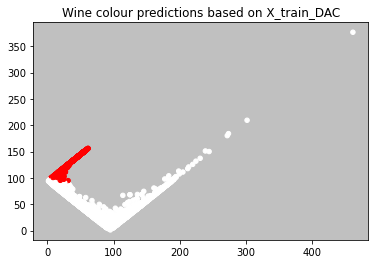

In [21]:
y_DAC_predict = svm_DAC.predict(X_train_DAC)
y_kmeans_predict = svm_kmeans.predict(X_train_kmeans)
y_DAC_predict_new = postprocess(y_DAC_predict[:, np.newaxis], y_kmeans_predict)
plt.figure()
ax = plt.axes()
plt.scatter(X_train_DAC[:, 0], X_train_DAC[:, 1], c=y_DAC_predict, s=20)
plt.title("Wine colour predictions based on X_train_DAC")

ax.set_facecolor('silver')
plt.show()

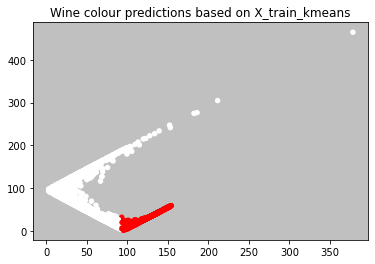

In [22]:
plt.figure()
ax = plt.axes()
plt.scatter(X_train_kmeans[:, 0], X_train_kmeans[:, 1], c=y_kmeans_predict, s=20)
plt.title("Wine colour predictions based on X_train_kmeans")
ax.set_facecolor('silver')
plt.show()

<ul style="background-color:#adebad;">
    <li>
        Create a fixed 2D embedding (e.g. with LLE, t-SNE, MDS) of the wine data and color the markers according to quality and color. Fit and transform X_train with DAC(n_clusters=2,3,4,5,6,7,8,...). Produce a plot of the SVM score svm_DAC.score(X_test_DAC, y_test) as a function of n_clusters.. Each time use marker shapes to display the cluster memberships, and compare to the labels color and quality.
    </li>
</ul>

In [23]:
"""
    %%time
    lle = skl.manifold.LocallyLinearEmbedding(random_state=...)
    lle.fit(...)
"""

'\n    %%time\n    lle = skl.manifold.LocallyLinearEmbedding(random_state=...)\n    lle.fit(...)\n'

In [24]:
lle = skl.manifold.LocallyLinearEmbedding(random_state=42, n_components=2)
lle.fit(X_train)
X_test_transformed = lle.transform(X_test)

 NUMBER OF CLUSTERS:  2


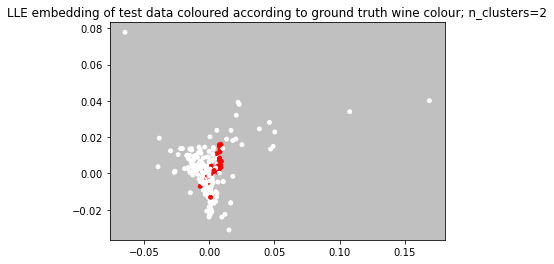

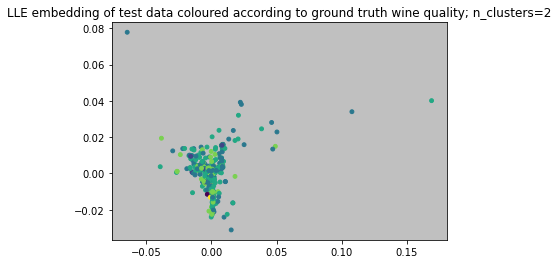

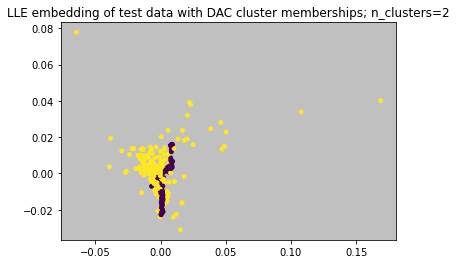






 NUMBER OF CLUSTERS:  3


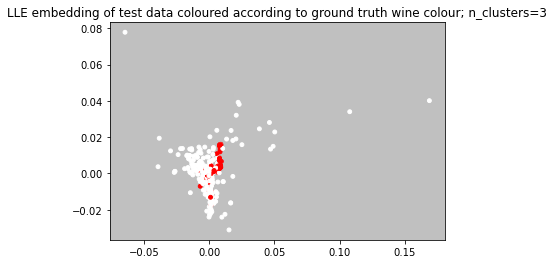

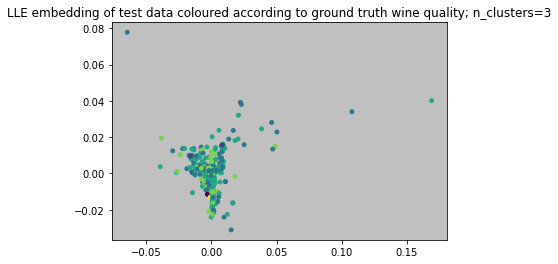

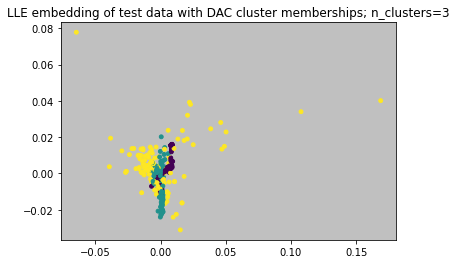






 NUMBER OF CLUSTERS:  4


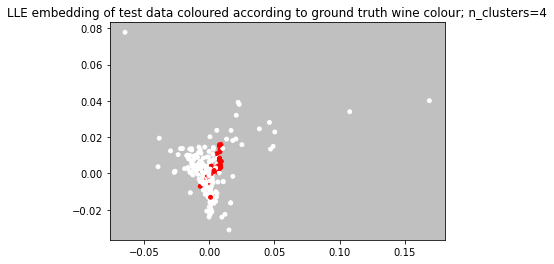

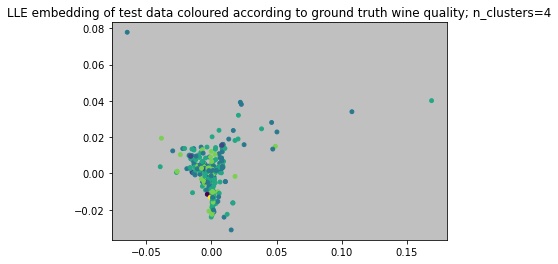

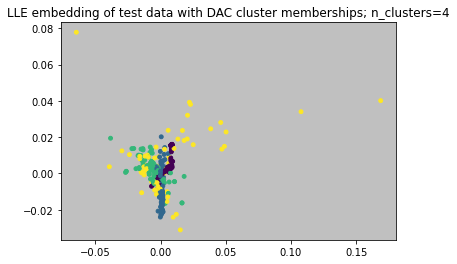






 NUMBER OF CLUSTERS:  5


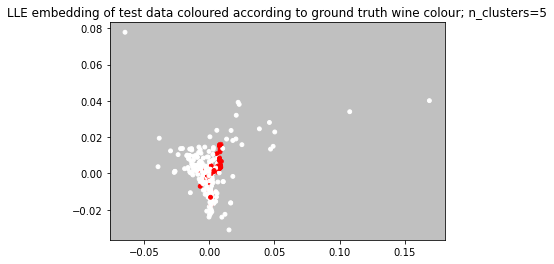

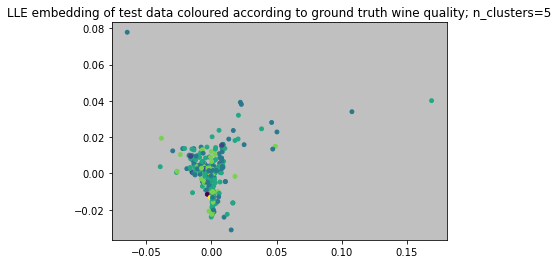

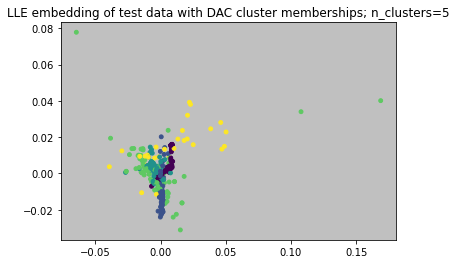






 NUMBER OF CLUSTERS:  6


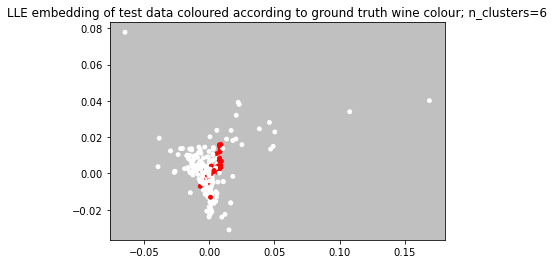

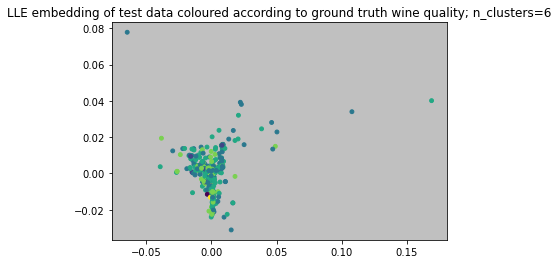

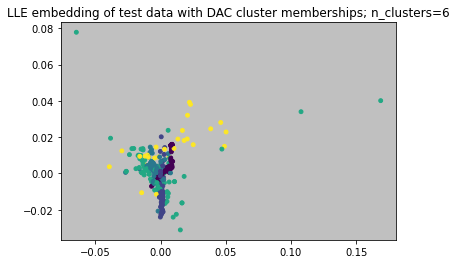






 NUMBER OF CLUSTERS:  7


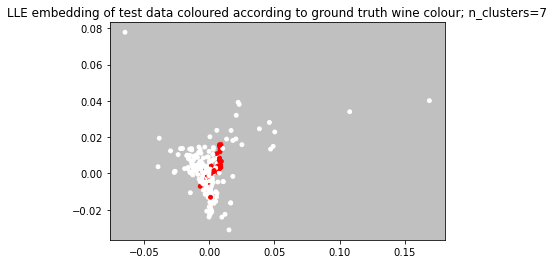

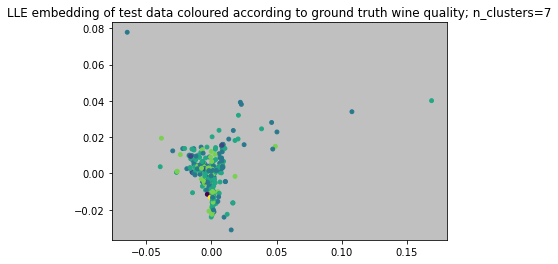

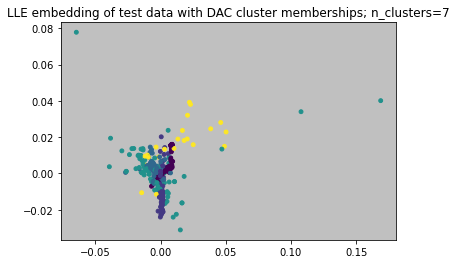






 NUMBER OF CLUSTERS:  8


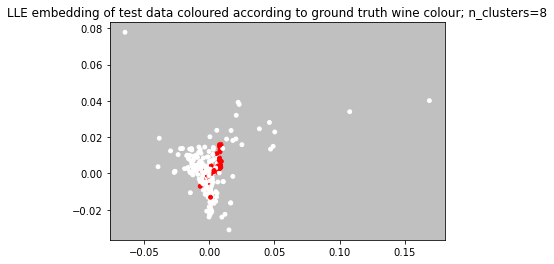

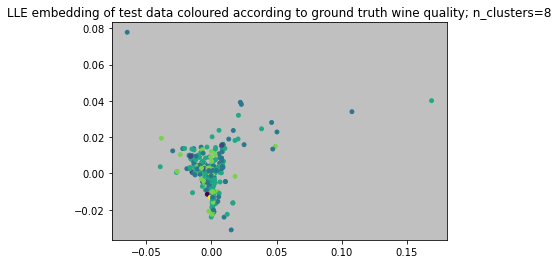

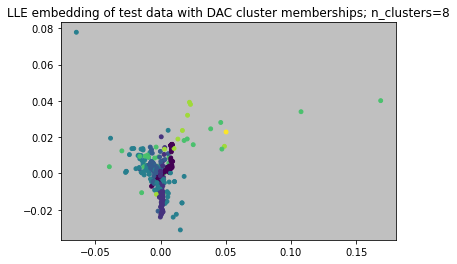

In [25]:
n_clusters = [2,3,4,5,6,7,8]
scores = []
for n in n_clusters:
    DAC = DeterministicAnnealingClustering(n_clusters=n, random_state=42)
    DAC.fit(X_train)
    X_train_DAC = DAC.transform(X_train)
    X_test_DAC = DAC.transform(X_test)

    svm_DAC = svm.SVC(random_state=42)
    svm_DAC.fit(X_train_DAC, y_train[:,0])

    fig, ax = plt.subplots()

    print("="*30)
    print(' NUMBER OF CLUSTERS: ', str(n))
    print("="*30)
    ax.scatter(X_test_transformed[:, 0], X_test_transformed[:, 1], c=y_test[:,0], s=15)
    plt.title("LLE embedding of test data coloured according to ground truth wine colour; n_clusters="+str(n))
    ax.set_facecolor('silver')
    plt.show()

    fig, ax = plt.subplots()

    ax.scatter(X_test_transformed[:, 0], X_test_transformed[:, 1], c=y_test_quality[:,0], s=15)
    plt.title("LLE embedding of test data coloured according to ground truth wine quality; n_clusters="+str(n))
    ax.set_facecolor('silver')
    plt.show()


    fig, ax = plt.subplots()
    ax.scatter(X_test_transformed[:, 0], X_test_transformed[:, 1], c=np.argmax(DAC.predict(X_test), axis=1), s=15)
    ax.set_facecolor('silver')
    plt.title("LLE embedding of test data with DAC cluster memberships; n_clusters="+str(n))
    plt.show()
    print('\n\n\n\n')

    scores.append(svm_DAC.score(X_test_DAC, y_test))


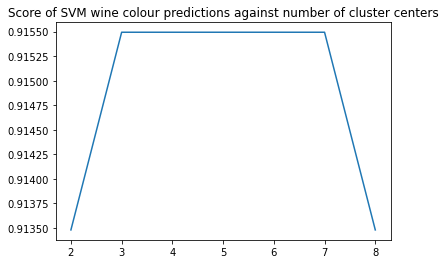

In [26]:
fig = plt.figure()
ax = plt.axes()
plt.title("Score of SVM wine colour predictions against number of cluster centers")
ax.plot(n_clusters, scores);

<ul style="background-color:#adebad;">
        <li>
            So far, our implementation of DAC assumed that our data is compatible with the euclidian metric. Argue why this assumption is not justified for the wine-data. Suggest a better alternative (no implementation required!).
        </li>
    </ul>
</p>



Euclidean distance as a distoriton metric can be negatively affected by high dimensional spaces. The data might live on some topological space where the distances in the euclidean space might not be meaningul. As an example, a manifold could be in the shape of a donut. Along the donut surface of the donut, the distance from one side of the donut to the other is far, but in the euclidean space, these points are not as far, becasue the shortest distance is directly accross the whole in the donut. If your data is highly dimensional, dimensions of your data that are not informative (accross the hole of the donut) might negate the informative dimensions of your data.

In [27]:
import sklearn
u,s,v=np.linalg.svd(X)
print('Normalized Singular values of SVD:\n',list(s/np.linalg.norm(s)))

Normalized Singular values of SVD:
 [0.9943642636734559, 0.0897537123772139, 0.04624331336558591, 0.030723588047277962, 0.009523278538176156, 0.002525226378779616, 0.0014601726694596431, 0.0011514258384013128, 0.0008960440471759613, 0.0004759777532151149, 0.00020594248231210286]


Based on the above SVD analyis it is evident that there is one dimensin, in the wine data, that is significantly more informative than the others. This suggests that when using the euclidean metric without any preprocessing, the uninformative dimensions could negatively affect the clustering of the whine data. 

To improve the clustering, an option could be to perform a PCA to reduce the dimensionality of the data (this reduces the data in such a manner that the most effective dimensions are maintained). The clustering could then be performed on this transformed dataset. 